# Importing 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
EWAL=pd.read_excel('E:\crome downloades\Excelr/EastWestAirlines.xlsx',sheet_name='data')
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA 

In [4]:
EWAL.shape

(3999, 12)

In [5]:
EWAL.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
scalar=MinMaxScaler()
EWAL_scaled=scalar.fit_transform(EWAL.iloc[:,1:])

In [14]:
EWAL_norm=pd.DataFrame(EWAL_scaled)
EWAL_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Hierarchichal

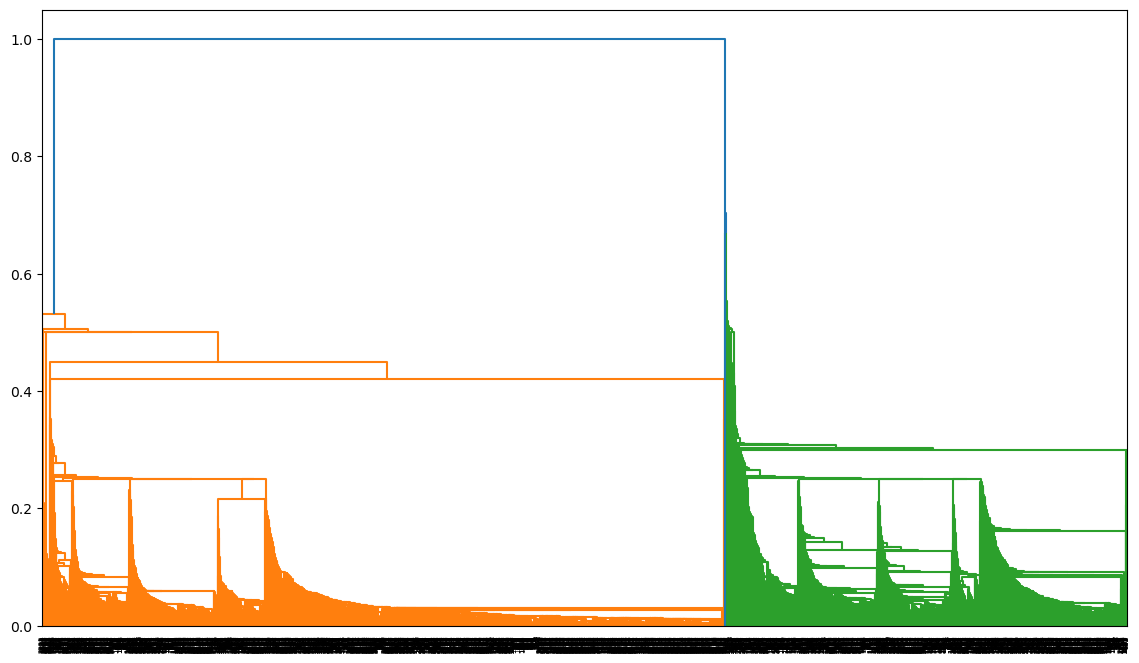

In [8]:
plt.figure(figsize=(14,8))
dendrogram=sch.dendrogram(sch.linkage(EWAL_norm,method='single'))

In [9]:
from sklearn.metrics import silhouette_score as sil

In [16]:
nc=[2,3,4,5,6,7,8,9,10]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,linkage='single',affinity='euclidean')
    y=hc.fit_predict(EWAL_norm.iloc[:,:10])
    sc_score.append(sil(EWAL_norm.iloc[:,:10],y))
print('silhout score',sc_score)

silhout score [0.6626048712239866, 0.3500610320368856, 0.3484571052666959, 0.3481223794633064, 0.34607936863073935, 0.21586598300650822, 0.21989311696635602, 0.12102373991382491, 0.1207559321980969]


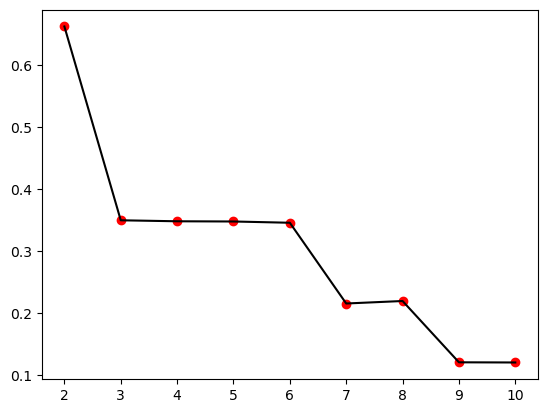

In [18]:
plt.plot(nc,sc_score,color='black')
plt.scatter(nc,sc_score,color='red')
plt.show()

## Best silhout score is for first index so optimim no. of clusters will be 2.

In [19]:
f_hc=AgglomerativeClustering(n_clusters=2,linkage='single',affinity='euclidean')

In [20]:
y_hc=f_hc.fit_predict(EWAL_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [21]:
EWAL['y_hc']=y_hc
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_hc
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [22]:
EWAL.groupby(['y_hc'])['ID#'].apply(lambda x:tuple(x))

y_hc
0    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
1    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
Name: ID#, dtype: object

In [23]:
EWAL['y_hc'].value_counts()

1    2518
0    1481
Name: y_hc, dtype: int64

## KMeans

In [24]:
EWALkm=pd.read_excel('E:\crome downloades\Excelr/EastWestAirlines.xlsx',sheet_name='data')
EWALkm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [25]:
scalar=MinMaxScaler()
EWALkm_scaled=scalar.fit_transform(EWALkm.iloc[:,1:])

In [26]:
EWALkm_norm=pd.DataFrame(EWALkm_scaled)
EWALkm_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [27]:
n_c=[2,3,4,5,6,7,8,9,10]
score=[]
score_elbow=[]
for i in n_c:
    km=KMeans(i)
    km.fit(EWALkm_norm.iloc[:,:10])
    y_km=km.fit_predict(EWALkm_norm.iloc[:,:10])
    score.append(sil(EWALkm_norm.iloc[:,:10],y_km))
    score_elbow.append(km.inertia_)


## Best Scores

In [28]:
print(score)

print(score_elbow)

[0.4811541557645117, 0.4038501582257056, 0.37660565218548464, 0.3755459556254094, 0.32641046416199165, 0.3339707978008001, 0.33794446217971397, 0.34762400831956936, 0.34288633389537504]
[448.9989194445697, 331.4336559970884, 272.39262630647465, 241.0754528059053, 217.76262160844354, 200.21510029479705, 183.1819955644155, 171.31798806896845, 160.70732625008824]


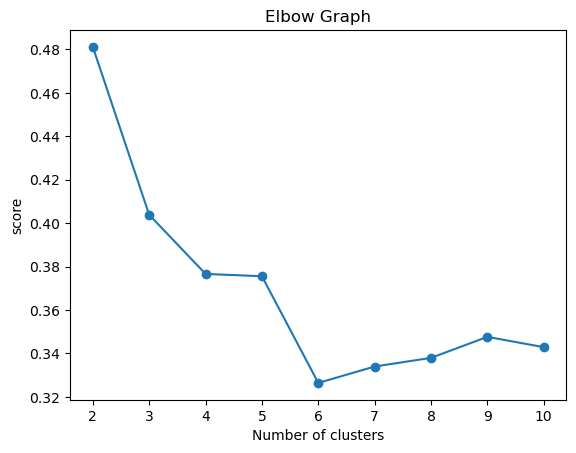

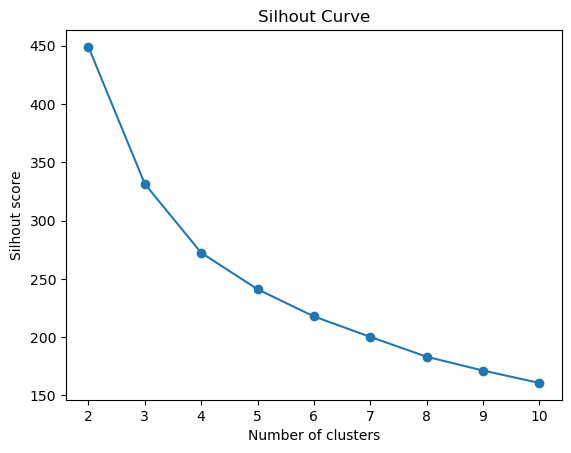

In [29]:
plt.plot(n_c,score)
plt.scatter(n_c,score)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()
plt.plot(n_c,score_elbow)
plt.scatter(n_c,score_elbow)
plt.title('Silhout Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhout score')
plt.show()

# optimim no. of cluster is 4

In [32]:
kmm=KMeans(n_clusters=4)
kmm.fit(EWALkm_norm.iloc[:,:10])
y_km_2=kmm.fit_predict(EWALkm_norm.iloc[:,:10])

# y_km_2=pd.DataFrame(y_km_2)
## y_km_2

## y_kmeans=kmm.labels_
## pd.DataFrame(y_kmeans).value_counts()

In [33]:
EWALkm['y_kmeans']=y_km_2

In [34]:
EWALkm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [35]:
EWALkm['y_kmeans'].value_counts()

0    1408
3    1165
1     747
2     679
Name: y_kmeans, dtype: int64

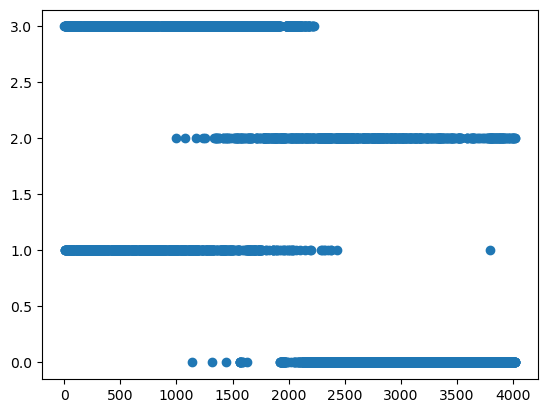

In [36]:
plt.scatter(EWALkm["ID#"],EWALkm["y_kmeans"],cmap=plt.cm.Accent)
plt.show()

## DBSCAN

In [37]:
EWALdb=pd.read_excel('E:\crome downloades\Excelr/EastWestAirlines.xlsx',sheet_name='data')
EWALdb

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
scalar=MinMaxScaler()
EWALdb_scaled=scalar.fit_transform(EWALdb.iloc[:,1:])

In [39]:
EWALdb_norm=pd.DataFrame(EWALdb_scaled)
EWALdb_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [40]:
dbscan=DBSCAN(eps=0.4,min_samples=4)
dbscan.fit(EWALdb_norm.iloc[:,:10])
y_pred=dbscan.labels_

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_db=dbscan.labels_
y_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
EWALdb['y_db']=y_pred

In [44]:
EWALdb['y_db'].value_counts()

 0    3933
 2      26
-1      17
 1      14
 3       9
Name: y_db, dtype: int64

In [45]:
EWALdb['y_db']=y_db
EWALdb

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


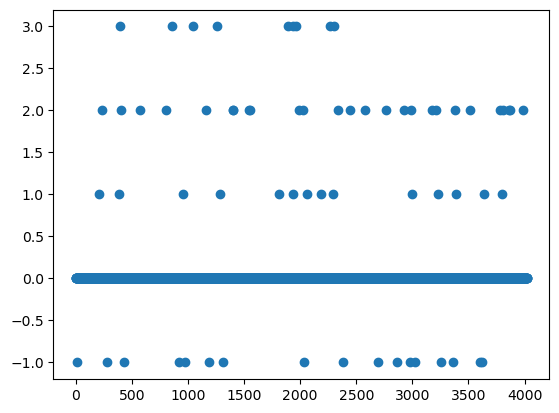

In [46]:
plt.scatter(EWALdb["ID#"],EWALdb["y_db"],cmap=plt.cm.Accent)
plt.show()

In [52]:
EWAL['y_hc']=y_hc
EWAL['y_km']=EWALkm['y_kmeans']
EWAL['y_db']=y_db
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_hc,y_km,y_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [54]:
EWAL=EWALkm.rename(columns={'Award?':'award'})
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,y_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# For hierarchical clustering we are getting 2 clusters, for kmeans we are getting 4 clusters and for DBSCAN we are getting 5 clusters.